In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import RobustScaler
import warnings
warnings.filterwarnings("ignore")

df=pd.read_csv('AB_NYC_2019.csv')
pd.DataFrame(df)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [2]:
#about columns
df.columns
#about data
df.describe()
#info of data
df.info()
df.notnull()
# chack for duplicate
df.duplicated()
df.dropna(how='all')
print(df)
#fill nan values
df["reviews_per_month"].fillna(df["reviews_per_month"].mean(), inplace=True)
#drop extraa stuff
df.drop(['latitude', 'longitude'], axis=1, inplace=True)
# Drop rows where price > 1000,help in goood result
df = df[df['price'] <= 1000]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

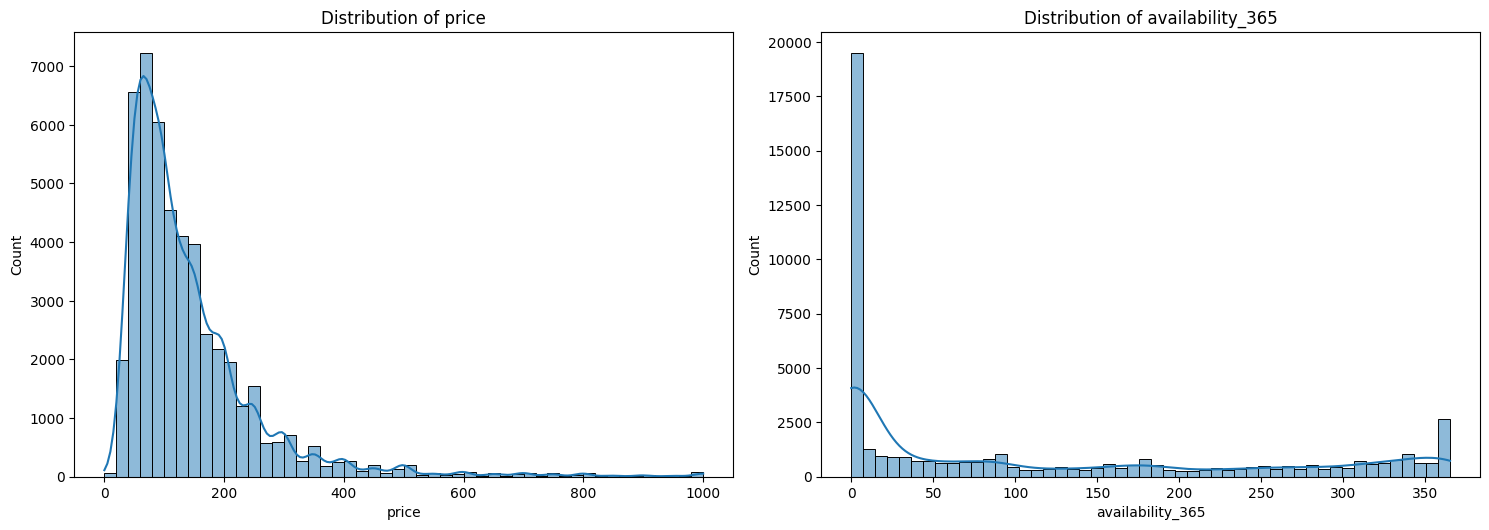

In [3]:
# List of numeric columns for univariate analysis
num_cols = ['price', 'availability_365']

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)  # 2 rows, 2 columns of plots
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


Availability peaks at 0 days, but most listings with consistent availability fall between 300 and 350 days. Similarly, prices are concentrated in the range of 0 to 200.

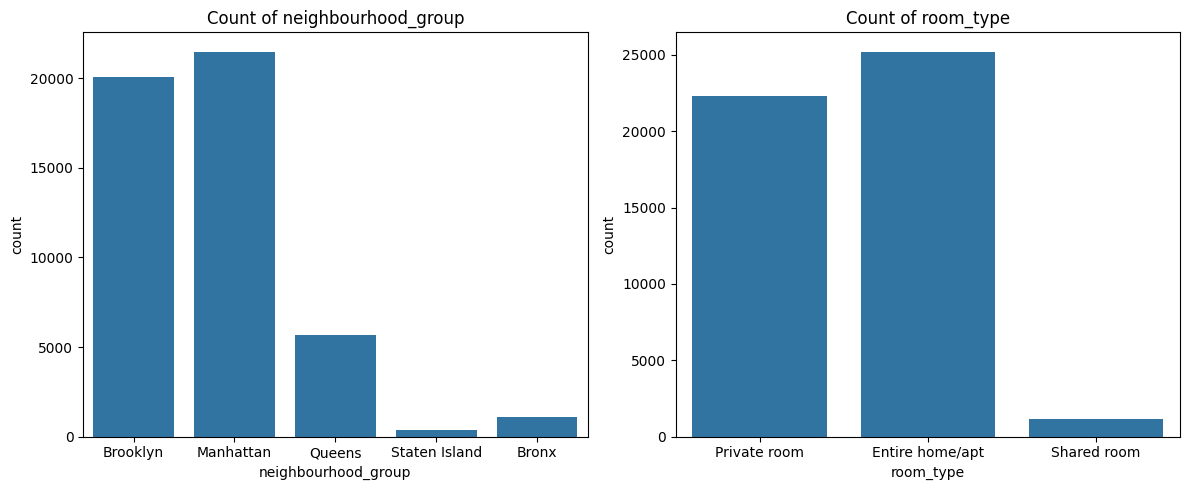

In [4]:
cat_cols = ['neighbourhood_group', 'room_type']

plt.figure(figsize=(12, 5))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(1, 2, i)
    sns.countplot(x=col, data=df)
    plt.title(f'Count of {col}')
plt.tight_layout()
plt.show()



People prefer entire homes or apartments more than shared or private rooms. 

As observed, Manhattan has the highest number of listings, followed by Brooklyn and Queens.

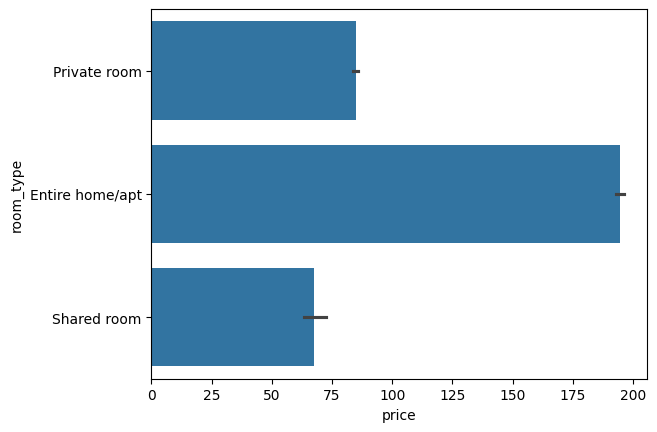

In [5]:
plt.Figure(figsize=(7,14))
sns.barplot(x="price", y="room_type",data=df )

plt.show()

In terms of price, entire homes are the most expensive, followed by shared rooms, while private rooms are the least costly

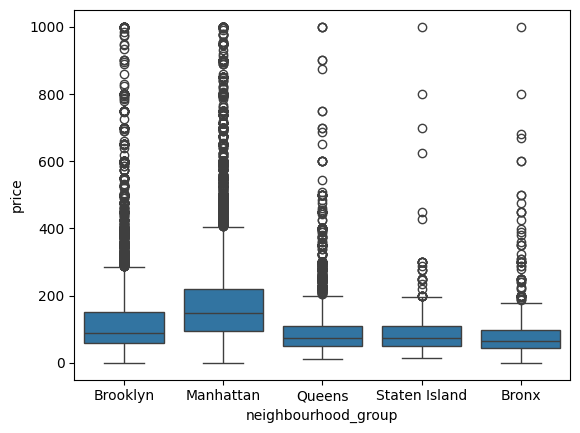

In [6]:
plt.Figure(figsize=(7,20))
sns.boxplot(x="neighbourhood_group", y="price",data=df )
 


plt.show()  

Manhattan has the highest median price among all neighbourhood groups.

Brooklyn has the second-highest median but a wide spread of prices.

Queens, Bronx, Staten Island have much lower medians and narrower price ranges.

Outliers (beyond whiskers) indicate a large number of high-priced listings across all groups, especially Manhattan and Brooklyn.

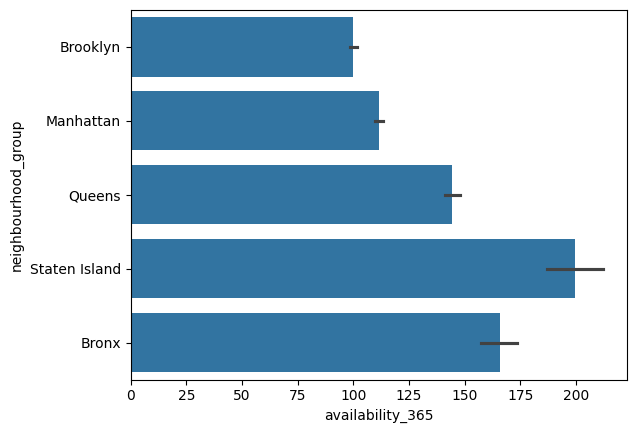

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [7]:
plt.Figure(figsize=(7,14))
sns.barplot(x="availability_365", y="neighbourhood_group",data=df )

plt.show() 
df.columns

In terms of availability, Staten Island ranks highest, followed by the Bronx, while Brooklyn has the lowest availability

In [ ]:

from sklearn.decomposition import PCA


features = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365']
X = df[features]

scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)


In [13]:

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_
df['Cluster'] = labels

df['Cluster'].value_counts()


Cluster
1    43386
0     5265
2        5
Name: count, dtype: int64


### Conclusion after Clustering
We grouped the listings into **3 clusters** based on price, minimum nights, reviews, and availability. 
This segmentation will later help us identify budget, mid-range, and premium segments.


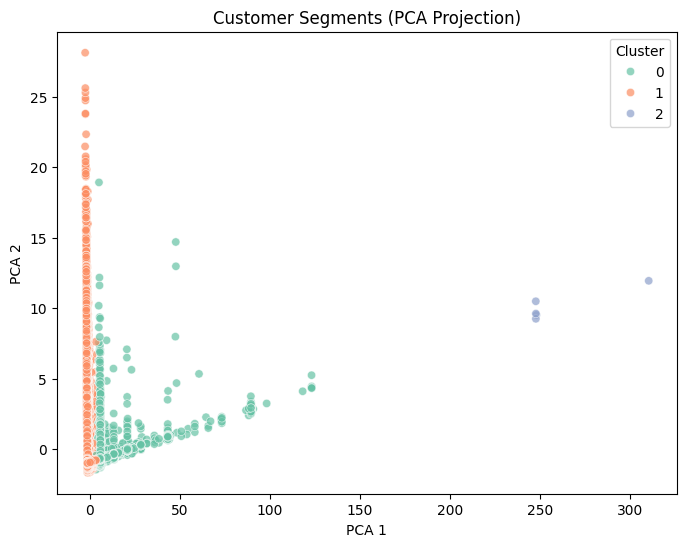

In [14]:

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = labels

plt.figure(figsize=(8,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='Set2', alpha=0.7)
plt.title('Customer Segments (PCA Projection)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()



### Conclusion after PCA Visualization
Clusters are well-separated in the PCA projection, which means our features successfully distinguish different types of customers.


In [15]:

cluster_summary = df.groupby('Cluster')[features].mean()
cluster_summary


,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
Cluster,,,,,
0,156.149478,38.097056,8.252991,0.849584,216.699525
1,139.471650,3.076499,25.192297,1.438429,99.774374
2,173.600000,1049.400000,5.600000,0.793289,276.600000



### Cluster Profile Insights
By examining average feature values per cluster, we can interpret each segment:
- **Cluster 0**: Budget listings (low price, short stays, low availability)
- **Cluster 1**: Mid-range (moderate price, standard availability)
- **Cluster 2**: Premium (high price, higher availability or special cases)



## Final Conclusions
- The data shows **clear segmentation** into 3 customer groups.
- Price is the most significant differentiator among clusters.
- Outliers were handled by RobustScaler, ensuring fair contribution of each feature.
- PCA helped visualize clusters in 2D for better interpretation.
- These segments can help the business create **targeted pricing and marketing strategies**.
